In [337]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import uszipcode
import numpy as numpy
import time
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [338]:
CDIA_df = pd.read_csv("data\\U.S._Chronic_Disease_Indicators__Alcohol1.csv",header=0, thousands=r',', dtype={'DataValueAlt': numpy.float64})
CDIA_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueTypeID,...,TopicID,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,59,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,1,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,2,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,4,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,5,OVERALL,OVR,NaN,NaN,NaN,NaN


In [339]:
# mean of the BingeDrinking Data by state and year
binge_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC3_0') 
| (CDIA_df['QuestionID'] =='ALC4_0')
| (CDIA_df['QuestionID'] =='ALC2_2')
| (CDIA_df['QuestionID'] =='ALC2_3')
| (CDIA_df['QuestionID'] =='ALC2_1')
| (CDIA_df['QuestionID'] =='ALC2_2')
| (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
binge_df

LocationDesc   YearStart
Alabama        2010          131.475000
               2011           22.126190
               2012           23.306098
               2013           22.365854
               2014           24.804750
               2015            8.639744
               2016            9.417500
Alaska         2010           23.175000
               2011           14.185714
               2012           11.873261
               2013           14.985417
               2014           13.829318
               2015           11.958810
               2016           10.915385
Arizona        2010          224.675000
               2011           33.736585
               2012           30.465217
               2013           37.275000
               2014           31.516042
               2015            9.938298
               2016           10.432609
Arkansas       2010           87.475000
               2011           19.700000
               2012           15.531463
               

In [340]:
binge_df1 = binge_df.unstack(1)
binge_df1

YearStart,2010,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,,
Alabama,131.475,22.126190,23.306098,22.365854,24.804750,8.639744,9.417500
Alaska,23.175,14.185714,11.873261,14.985417,13.829318,11.958810,10.915385
Arizona,224.675,33.736585,30.465217,37.275000,31.516042,9.938298,10.432609
Arkansas,87.475,19.700000,15.531463,18.285714,18.056905,9.633056,10.497143
California,1078.000,93.412727,83.484127,106.702000,107.688235,9.450847,9.292157
Colorado,156.200,26.897826,24.141250,27.260870,26.388261,9.932889,11.302381
Connecticut,80.300,17.439535,16.432500,18.463830,17.950222,9.875686,10.685714
Delaware,28.825,13.765854,12.378298,12.357778,12.776667,9.364324,10.925000
District of Columbia,18.925,15.052273,12.850889,13.647826,13.640244,14.528043,13.847500


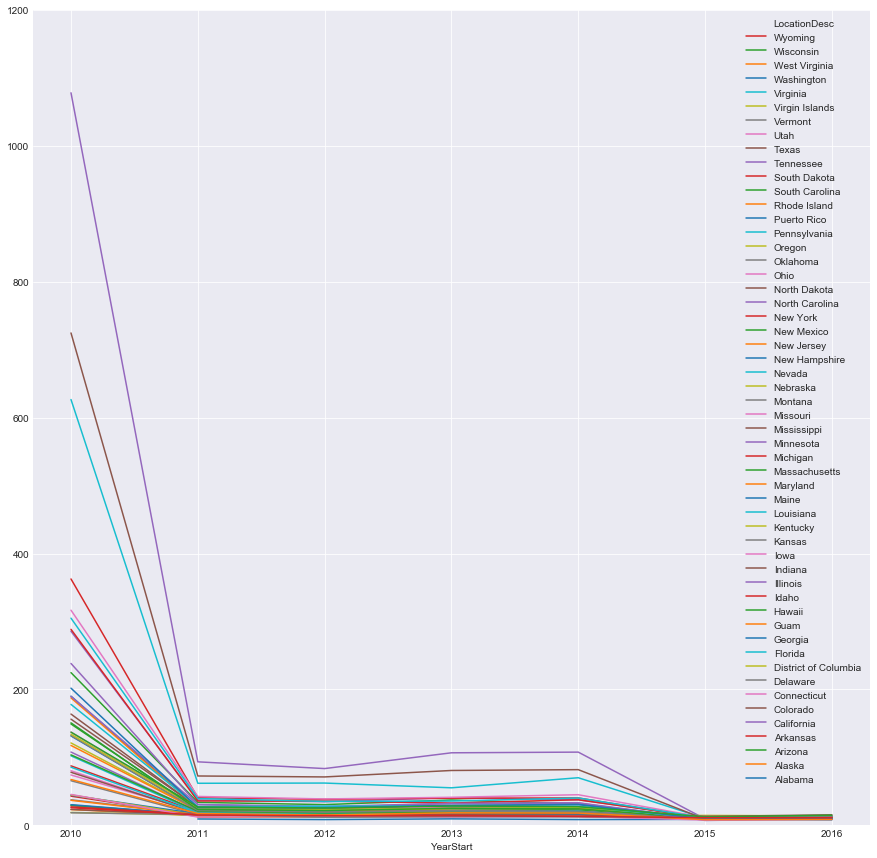

In [341]:
#plot graph of binge drinking for all states by year and value
binge_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,1200), figsize=(15,15))

In [342]:
binge_df2 = binge_df.drop('United States').groupby(['YearStart']).mean()
binge_df2

YearStart
2010    161.897059
2011     24.875110
2012     23.207292
2013     25.275049
2014     25.620840
2015     10.291973
2016     10.849658
Name: DataValueAlt, dtype: float64

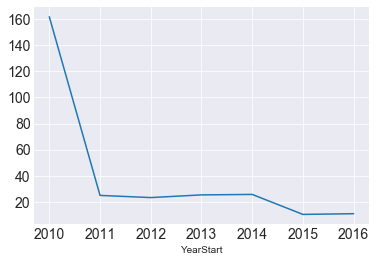

In [343]:
binge_plot = binge_df2.plot(kind='line', y = 'YearStart',  
  legend = False, fontsize=14)
binge_plot

In [344]:
#mean of the Heavy drinking by state and year
heavy_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC5_1') 
| (CDIA_df['QuestionID'] =='ALC5_2')
| (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
heavy_df 

LocationDesc   YearStart
Alabama        2010          131.475000
               2011           30.452174
               2012           32.281250
               2013           31.650000
               2014           35.847391
               2015            7.532609
               2016            6.810000
Alaska         2010           23.175000
               2011           13.459091
               2012           11.110800
               2013           13.103704
               2014           13.047391
               2015            9.543333
               2016            8.405556
Arizona        2010          224.675000
               2011           51.904545
               2012           46.792000
               2013           63.740000
               2014           50.438800
               2015            7.633333
               2016            7.523810
Arkansas       2010           87.475000
               2011           25.009524
               2012           18.431600
               

In [345]:
heavy_df1 = heavy_df.unstack(1)
heavy_df1

YearStart,2010,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,,
Alabama,131.475,30.452174,32.281250,31.650000,35.847391,7.532609,6.810000
Alaska,23.175,13.459091,11.110800,13.103704,13.047391,9.543333,8.405556
Arizona,224.675,51.904545,46.792000,63.740000,50.438800,7.633333,7.523810
Arkansas,87.475,25.009524,18.431600,22.820833,23.476818,8.085238,7.762500
California,1078.000,164.848276,152.512500,173.872414,192.874074,7.148387,6.720000
Colorado,156.200,40.139130,31.432593,35.938462,38.877500,6.558182,8.721053
Connecticut,80.300,23.880000,19.217037,24.426087,24.311818,7.925385,7.870000
Delaware,28.825,12.850000,10.551200,12.791667,11.534348,6.651579,8.864706
District of Columbia,18.925,12.545833,11.147600,11.920833,12.441304,11.071600,12.477273


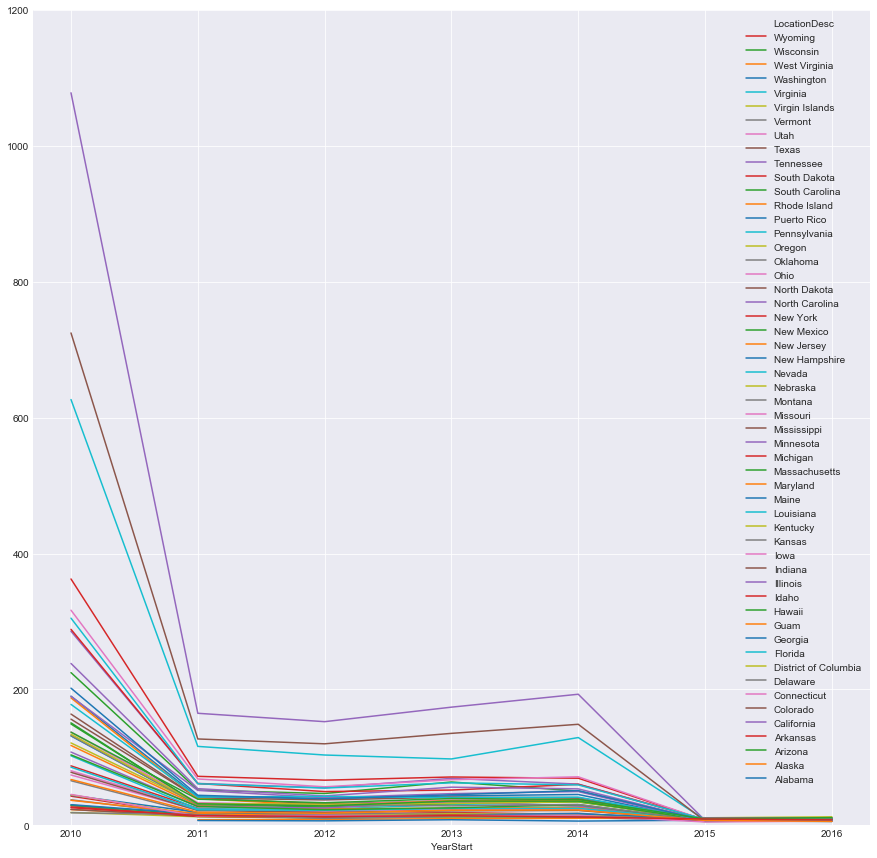

In [346]:
#plot graph of heavy drinking for all states by year and value
heavy_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,1200), figsize=(15,15))

In [347]:
heavy_df2 = heavy_df.drop('United States').groupby(['YearStart']).mean()
heavy_df2

YearStart
2010    161.897059
2011     35.718967
2012     31.895783
2013     36.194374
2014     37.315131
2015      7.982999
2016      8.200111
Name: DataValueAlt, dtype: float64

AttributeError: 'Series' object has no attribute 'columns'

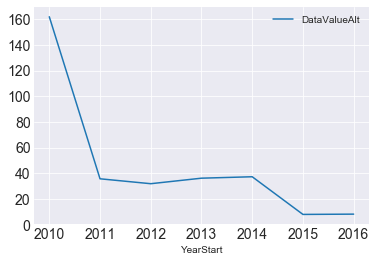

In [348]:

heavy_df2.rename(columns = {'DataValueAlt':'Heavy'})
heavy_plot = heavy_df2.plot(kind='line', y = 'YearStart', legend = True, fontsize=14,)
heavy_plot
heavy_df2.columns

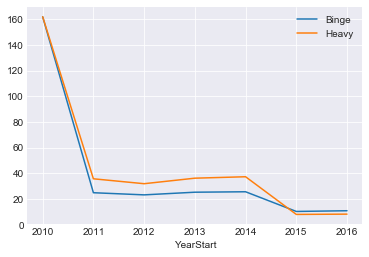

In [349]:
a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
a1_df.columns = ['Binge', 'Heavy']
a1_df.plot(kind='line')


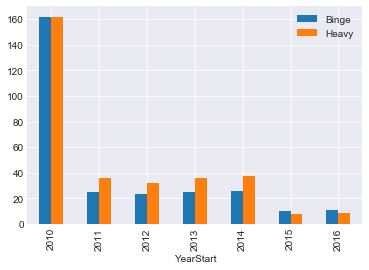

In [350]:
a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
a1_df.columns = ['Binge', 'Heavy']
a1_df.plot(kind='bar')

In [351]:
cldm_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC6_0') 
| (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
cldm_df 

LocationDesc   YearStart
Alabama        2010         100.343750
               2011          73.060000
               2012          78.855769
               2013          72.244444
               2014          85.953462
               2015           9.434615
               2016           8.150000
Alaska         2010          20.593750
               2011          22.140000
               2012          18.781071
               2013          19.296296
               2014          18.995769
               2015          11.224667
               2016           9.790000
Arizona        2010         150.163158
               2011         114.103571
               2012          99.500000
               2013         123.582759
               2014         113.045938
               2015           9.140000
               2016           8.910000
Arkansas       2010          67.200000
               2011          45.930769
               2012          40.946071
               2013          46.351852


In [352]:
cldm_df1 = cldm_df.unstack(1)
cldm_df1

YearStart,2010,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,,
Alabama,100.343750,73.060000,78.855769,72.244444,85.953462,9.434615,8.1500
Alaska,20.593750,22.140000,18.781071,19.296296,18.995769,11.224667,9.7900
Arizona,150.163158,114.103571,99.500000,123.582759,113.045938,9.140000,8.9100
Arkansas,67.200000,45.930769,40.946071,46.351852,49.341923,8.999333,9.2800
California,522.592000,412.023529,387.916216,434.435294,437.985714,9.040000,8.8200
Colorado,119.237500,87.873077,77.774286,80.725806,88.291724,7.367692,10.3200
Connecticut,60.856250,44.012000,42.320000,41.936667,45.591724,9.690667,9.3300
Delaware,26.676923,20.281818,15.575200,18.712500,21.338696,7.060000,10.0100
District of Columbia,20.430000,14.821053,13.363600,15.961905,15.002500,11.066000,13.4900


In [353]:
#plot graph of chronic liver disease mortality for all states by year and value

In [354]:
# Total mean of all states per year
cldm_df2 =cldm_df.drop('United States').groupby(['YearStart']).mean()
cldm_df2

YearStart
2010    107.395413
2011     76.394905
2012     72.495291
2013     79.076089
2014     81.855833
2015      9.265124
2016      9.718935
Name: DataValueAlt, dtype: float64

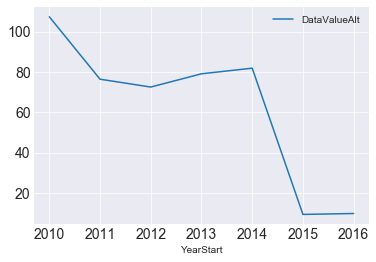

In [355]:
cldm_df2.plot(kind='line', y = 'YearStart',  
  legend = True, fontsize=14)

In [356]:
CDIA_df[(CDIA_df['QuestionID'] =='ALC3_0') & (CDIA_df['YearStart'] ==2016)]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueTypeID,...,TopicID,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
1140,2016,2016,IA,Iowa,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,19,OVERALL,OVR,NaN,NaN,NaN,NaN
1176,2016,2016,KS,Kansas,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,20,OVERALL,OVR,NaN,NaN,NaN,NaN
1201,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,59,OVERALL,OVR,NaN,NaN,NaN,NaN
1202,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,1,OVERALL,OVR,NaN,NaN,NaN,NaN
1203,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,2,OVERALL,OVR,NaN,NaN,NaN,NaN
1204,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,4,OVERALL,OVR,NaN,NaN,NaN,NaN
1205,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,5,OVERALL,OVR,NaN,NaN,NaN,NaN
1206,2016,2016,CA,California,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,6,OVERALL,OVR,NaN,NaN,NaN,NaN
1207,2016,2016,CO,Colorado,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,8,OVERALL,OVR,NaN,NaN,NaN,NaN
1208,2016,2016,CT,Connecticut,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,NaN,Number,MEAN,...,ALC,ALC3_0,NaN,9,OVERALL,OVR,NaN,NaN,NaN,NaN


In [357]:
binge_df3 = CDIA_df.loc[  ((CDIA_df['QuestionID'] =='ALC3_0') 
| (CDIA_df['QuestionID'] =='ALC4_0')
| (CDIA_df['QuestionID'] =='ALC2_2')
| (CDIA_df['QuestionID'] =='ALC2_3')
| (CDIA_df['QuestionID'] =='ALC2_1')
| (CDIA_df['QuestionID'] =='ALC2_2') )
& (CDIA_df['YearStart'] ==2016)].groupby(['QuestionID','LocationDesc']).mean()

binge_df4 = binge_df3.loc[:,'DataValueAlt'].unstack().T
binge_df4


QuestionID,ALC2_2,ALC2_3,ALC3_0,ALC4_0
LocationDesc,,,,
Alabama,14.621429,13.800000,4.740000,6.650000
Alaska,17.484615,22.800000,3.900000,7.200000
Arizona,16.512500,15.033333,5.016667,7.658333
Arkansas,16.258333,16.300000,5.370000,8.762500
California,15.600000,15.525000,3.757143,6.542857
Colorado,17.712500,20.166667,4.060000,6.870000
Connecticut,16.837500,18.200000,3.810000,6.980000
Delaware,16.921429,20.833333,4.650000,7.090000
District of Columbia,23.264286,30.733333,3.730000,6.250000


In [358]:
binge_df5 = binge_df4.drop('United States').groupby(['LocationDesc']).mean()
binge_df5

QuestionID,ALC2_2,ALC2_3,ALC3_0,ALC4_0
LocationDesc,,,,
Alabama,14.621429,13.800000,4.740000,6.650000
Alaska,17.484615,22.800000,3.900000,7.200000
Arizona,16.512500,15.033333,5.016667,7.658333
Arkansas,16.258333,16.300000,5.370000,8.762500
California,15.600000,15.525000,3.757143,6.542857
Colorado,17.712500,20.166667,4.060000,6.870000
Connecticut,16.837500,18.200000,3.810000,6.980000
Delaware,16.921429,20.833333,4.650000,7.090000
District of Columbia,23.264286,30.733333,3.730000,6.250000


In [379]:
binge_df6=binge_df5.T
binge_df6
binge_df7 = binge_df6.groupby(['QuestionID']).mean()
#binge_df7 = binge_df7.reset_index()
binge_df7

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
QuestionID,,,,,,,,,,,,,,,,,,,,,
ALC2_2,14.621429,17.484615,16.512500,16.258333,15.600000,17.712500,16.8375,16.921429,23.264286,15.562500,...,14.183333,16.800000,13.069231,22.307692,17.830000,14.7625,15.956250,12.9500,24.392857,19.163636
ALC2_3,13.800000,22.800000,15.033333,16.300000,15.525000,20.166667,18.2000,20.833333,30.733333,16.825000,...,16.700000,19.050000,12.566667,23.200000,NaN,16.7250,16.940000,11.0000,30.150000,18.400000
ALC3_0,4.740000,3.900000,5.016667,5.370000,3.757143,4.060000,3.8100,4.650000,3.730000,4.368750,...,5.000000,4.950000,4.320000,5.262500,5.150000,4.3750,4.542857,5.0125,4.075000,4.387500
ALC4_0,6.650000,7.200000,7.658333,8.762500,6.542857,6.870000,6.9800,7.090000,6.250000,6.864286,...,6.840000,6.866667,7.590000,7.112500,6.766667,7.1250,6.516667,8.1500,7.150000,6.975000


In [380]:
# pie charts for differents types of binge drinking
binge_df7["Mean"] = binge_df7.mean(axis=1)
binge_df7


LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Mean
QuestionID,,,,,,,,,,,,,,,,,,,,,
ALC2_2,14.621429,17.484615,16.512500,16.258333,15.600000,17.712500,16.8375,16.921429,23.264286,15.562500,...,16.800000,13.069231,22.307692,17.830000,14.7625,15.956250,12.9500,24.392857,19.163636,17.452908
ALC2_3,13.800000,22.800000,15.033333,16.300000,15.525000,20.166667,18.2000,20.833333,30.733333,16.825000,...,19.050000,12.566667,23.200000,NaN,16.7250,16.940000,11.0000,30.150000,18.400000,18.346195
ALC3_0,4.740000,3.900000,5.016667,5.370000,3.757143,4.060000,3.8100,4.650000,3.730000,4.368750,...,4.950000,4.320000,5.262500,5.150000,4.3750,4.542857,5.0125,4.075000,4.387500,4.444692
ALC4_0,6.650000,7.200000,7.658333,8.762500,6.542857,6.870000,6.9800,7.090000,6.250000,6.864286,...,6.866667,7.590000,7.112500,6.766667,7.1250,6.516667,8.1500,7.150000,6.975000,7.180252
